In [3]:
import os 
print(os.getcwd())


/home/mili/Documentos/Famaf/tercer_año/redes/laboratorio/redes23lab3g01/src


In [4]:
ls


General.anf        Makefile*     out/         results/
Generator.cc*      network.ned*  Queue.cc*    Sink.cc*
lab3-kickstarter*  omnetpp.ini*  redes.ipynb


In [5]:
#Configuracion inicial
%matplotlib inline
import matplotlib.pyplot as plt #librería para graficas de python
import numpy # extiende las librerias de matemática de python
import pandas as pd #libreria para procesamiento de datos muy usada en la industria
import seaborn # Extiende las funcionalidades de matplotlib, muy usado en data visualization
import csv 

str_filename = 'results/exported_stads/diseño_mejorado/1/bufferSize/0.1.csv'

data = pd.read_csv(str_filename)

data


,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,datetime,20230514-15:02:48,NaN,NaN
2,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,datetimef,20230514-150248,NaN,NaN
3,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,network,Network,NaN,NaN


In [6]:
#Omnet guarda los valores de nuestro "vector" (lista de valores) en una celda, por lo que tengo que extraer estos valores
#version vieja 26-27-28 version nueva 30-31-32 y puede que 33
time_gen = data['vectime'].loc[[30]].tolist()
buffer_gen = data['vecvalue'].loc[[30]].tolist()

time_queue = data['vectime'].loc[[31]].tolist()
buffer_queue = data['vecvalue'].loc[[31]].tolist()

#solo para el diseño mejorado
#time_queue1 = data['vectime'].loc[[33]].tolist()
#buffer_queue1 = data['vecvalue'].loc[[33]].tolist()


time_sink = data['vectime'].loc[[32]].tolist()
buffer_sink = data['vecvalue'].loc[[32]].tolist()



# Los valores que sacamos estan como un solostring separados por comas por lo que tengo que convertirlos a listas para poder graficarlos
time_gen = list(map(float,time_gen[0].split()))
time_queue = list(map(float,time_queue[0].split()))
time_sink = list(map(float,time_sink[0].split()))
buffer_gen = list(map(float,buffer_gen[0].split()))
buffer_queue = list(map(float,buffer_queue[0].split()))
buffer_sink = list(map(float,buffer_sink[0].split()))

#time_queue1=list(map(float,time_queue1[0].split()))
#buffer_queue1=list(map(float,buffer_queue1[0].split()))

print(len(time_gen))
print(len(buffer_gen))
print(len(time_queue))
print(len(buffer_queue))
print(len(time_sink))
print(len(buffer_sink))
#print(len(time_queue1))
#print(len(buffer_queue1))

1979
1979
1151
1151
1150
1150


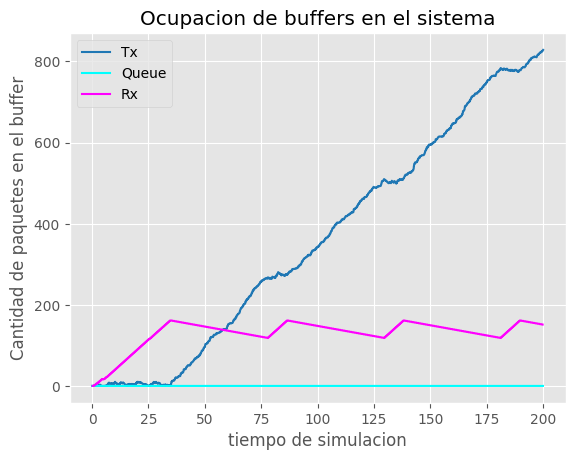

In [57]:
fig, ax1 = plt.subplots()
plt.plot(time_gen,buffer_gen, color='tab:blue', label="Tx")
plt.plot(time_queue,buffer_queue, color='cyan', label="Queue")
plt.plot(time_sink,buffer_sink, color='magenta', label="Rx")
#plt.plot(time_queue1,buffer_queue1, color='pink', label="Queue_1")
plt.title('Ocupacion de buffers en el sistema')
plt.xlabel("tiempo de simulacion")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
ax1.grid(True)

plt.show()


In [10]:
file_name = 'results/exported_stads/diseño_mejorado/1/CargaUtilDelay/0.1.csv'
data = pd.read_csv(file_name)
data

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20230514-16:04:11-152514,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20230514-16:04:11-152514,runattr,NaN,NaN,datetime,20230514-16:04:11,NaN,NaN
2,General-0-20230514-16:04:11-152514,runattr,NaN,NaN,datetimef,20230514-160411,NaN,NaN
3,General-0-20230514-16:04:11-152514,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20230514-16:04:11-152514,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20230514-16:04:11-152514,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20230514-16:04:11-152514,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20230514-16:04:11-152514,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20230514-16:04:11-152514,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20230514-16:04:11-152514,runattr,NaN,NaN,network,Network,NaN,NaN


In [49]:
cargaRecibida =[998,976,655,324,200] #simulacion original ambos casos
cargaRecibida_new =[998,976,655,324,200] #simulacion con diseño mejorado caso 1
[1151, 989, 659, 326, 200]
packetGenList = []


for file_name in ["0.1.csv", "0.2.csv", "0.3.csv", "0.6.csv", "1.csv"]:
    file_name = 'results/exported_stads/diseño_mejorado/1/CargaUtilDelay/' + file_name
    #fh = open(file_name)
    data = pd.read_csv(file_name)
    #version vieja es 26 nueva es 30
    packetGen = data['vecvalue'].loc[[30]].tolist()
    packetGen = list(map(float,packetGen[0].split()))
    value = len(packetGen)
    # append the value to the list
    packetGenList.append(value)
    #fh.close() # close the file object when done
    
    print(packetGenList)

[1151]
[1151, 989]
[1151, 989, 659]
[1151, 989, 659, 326]
[1151, 989, 659, 326, 200]


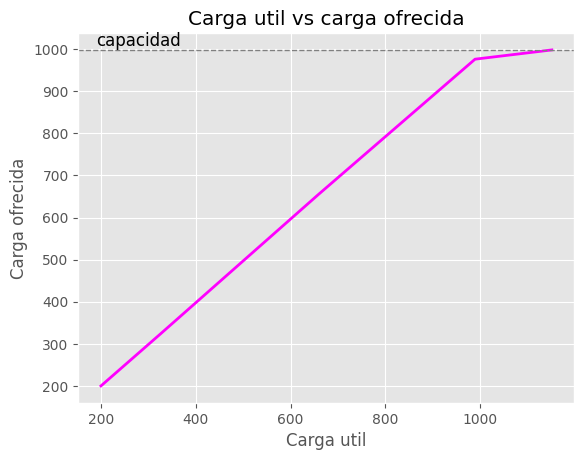

In [50]:
fig, ax = plt.subplots()
# plot the data
ax.plot(packetGenList, cargaRecibida, color='magenta', linewidth=2)

# Find the maximum value of cargaRecibida
max_carga_recibida = max(cargaRecibida)

# Add a horizontal line at max_carga_recibida
ax.axhline(y=max_carga_recibida, color='grey', linestyle='--',linewidth=1)

# Add the text 'capacidad' at the location of the horizontal line
ax.text(x=280, y=max_carga_recibida+0.1, s='capacidad', ha='center', va='bottom', fontsize=12)

# set the plot title and labels
plt.title('Carga util vs carga ofrecida')
plt.xlabel("Carga util")
plt.ylabel("Carga ofrecida")

plt.show()

5


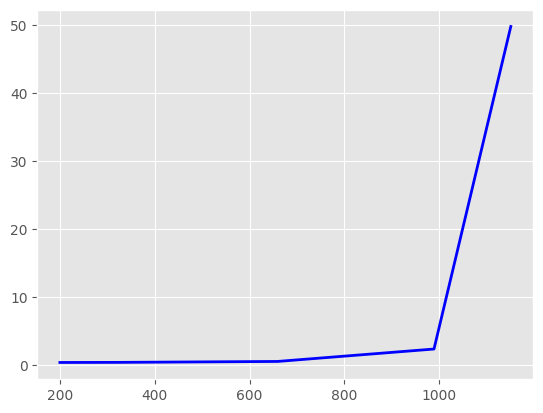

In [51]:
delay = [32.879469,2.398693,0.575730,0.439918,0.424711]#simulacion inicial ambos casos
delay_new = [49.741569,2.398693,0.575730,0.439918,0.424711] #simulacion con diseño mejorado caso 1

fig, ax = plt.subplots() #creo una figura y divido en pares para dibujar
ax.plot(packetGenList,delay_new, color='blue', linewidth=2)
print(len(packetGenList))
plt.show()

In [52]:
file_name = 'results/exported_stads/diseño_mejorado/1/bufferSize/0.1.csv'
data = pd.read_csv(file_name)
data

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,datetime,20230514-15:02:48,NaN,NaN
2,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,datetimef,20230514-150248,NaN,NaN
3,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20230514-15:02:48-149314,runattr,NaN,NaN,network,Network,NaN,NaN


In [53]:
cargaRecibida =[998,976,655,324,200] #simulacion original ambos casos
cargaRecibida_new =[998,976,655,324,200] #simulacion con diseño mejorado caso 1

packets_in_queuesink = []

for file_name in ["0.1.csv", "0.2.csv", "0.3.csv", "0.6.csv", "1.csv"]:
    file_name = 'results/exported_stads/diseño_mejorado/1/bufferSize/' + file_name
    data = pd.read_csv(file_name)
    #version vieja es 26 nueva es 30
    packets_in_sink = data['vecvalue'].loc[[32]].tolist()
    packets_in_sink = list(map(float,packets_in_sink[0].split()))
    value = packets_in_sink[len(packets_in_sink) -1]
    # append the value to the list
    packets_in_queuesink.append(value)    

print(packets_in_queuesink)

[152.0, 14.0, 2.0, 1.0, 1.0]


In [54]:
#voy a chequear si los paquetes que me quedaron en la red se encuentran en el buffer de sink comparando las listas
diff_list = [packetGenList[i] - cargaRecibida_new[i] for i in range(len(cargaRecibida_new))]

print(diff_list)
print(packets_in_queuesink)


[153, 13, 4, 2, 0]
[152.0, 14.0, 2.0, 1.0, 1.0]


5
5


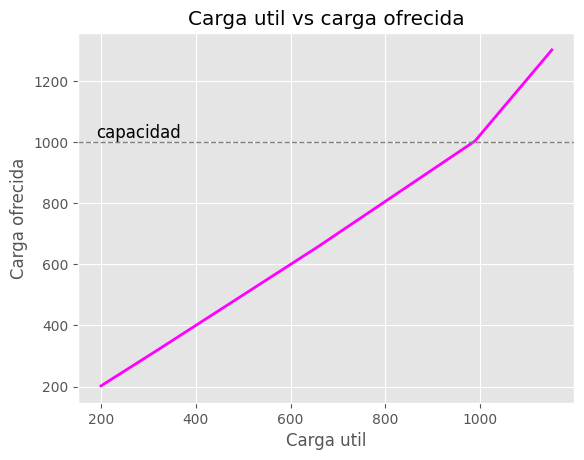

In [56]:
#vuelvo a hacer el grafico de carga util y enviada pero contando los packetes que estan en el buffer del sink 
#como recibidos ya que asumo que se podrian enviar sin problemas si la simulacion siguieta por unos segundos mas

fig, ax = plt.subplots()
# plot the data
cargaRecibida = [cargaRecibida[i] + packets_in_queuesink[i] for i in range(len(cargaRecibida))]

ax.plot(packetGenList, cargaRecibida, color='magenta', linewidth=2)

# Find the maximum value of cargaRecibida
max_carga_recibida = 1000

# Add a horizontal line at max_carga_recibida
ax.axhline(y=max_carga_recibida, color='grey', linestyle='--',linewidth=1)

# Add the text 'capacidad' at the location of the horizontal line
ax.text(x=280, y=max_carga_recibida+0.1, s='capacidad', ha='center', va='bottom', fontsize=12)

# set the plot title and labels
plt.title('Carga util vs carga ofrecida')
plt.xlabel("Carga util")
plt.ylabel("Carga ofrecida")

plt.show()
